# Integrate Multimedia (audio, image, video)

## 1. Audio files

Given a sample audio data file in mp3/wav format, we import the file to python using packages such as
- Ipython
- librosa

In [26]:
import os
import IPython.display as ipd
import librosa
import numpy as np
import pandas as pd

%matplotlib inline

Depending on the argument provided to Ipython, the files can be imported as follows:

- Filename argument: Embeds the audio file into the jupyter notebook `(embed=True)`. This increases the file size of the notebook since the audio file content is part of the notebook along with markdown instructions and code

- URL argument : Calls the audio file via path route `(embed=False)`. This assumes the file provided is present at a dedicated address (local or remote) and requests the file read similar to an API request.

In [ ]:
path_filename = os.path.join(
    "..", "..", "..", "data", "learning", "multimedia", "FMP_B_Note-C4_Piano.mp3"
)

# Filename argument
audio_element_filename = ipd.Audio(filename=path_filename)
print(
    "Size of <audio> tag (with embedded audio file): {} Bytes".format(
        len(audio_element_filename._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(audio_element_filename)

# URL argument
audio_element_url = ipd.Audio(url=path_filename)
print(
    "Size of <audio> tag (with linked audio file): {} Bytes".format(
        len(audio_element_url._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(audio_element_url)

### Reducing audio file size

Reducing audio file size (optimizing for embedding the file in jupyter notebooks) can be done via

- **Reducing audio file duration** : This cuts out audio content, highly undesirable
- **Reducing sampling rate** : Depending on what the maximum frequency of the audio sample is, sampling rate cannot be decreased to the point where:
  
  $$f_{Nyquist} \leq f_{max}$$
  
  where $f_{Nyquist} = \frac{f_s}{2}$ and $f_{max}$ is the maximum frequency in the audio file.
- **Convert to mono**
- **Use MP3 instead of WAV**

Below is comparison between WAV and MP3

In [ ]:
path_filename_wav = os.path.join(
    "..", "..", "..", "data", "learning", "multimedia", "FMP_B_Note-C4_Piano.wav"
)

# Ipython - Wav file
audio_element_wav = ipd.Audio(filename=path_filename_wav)
print(
    "Size of <audio> tag (with embedded WAV file): {} Bytes".format(
        len(audio_element_wav._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(audio_element_wav)

path_filename_mp3 = os.path.join(
    "..", "..", "..", "data", "learning", "multimedia", "FMP_B_Note-C4_Piano.mp3"
)

# Ipython - MP3 file
audio_element_mp3 = ipd.Audio(filename=path_filename_mp3)
print(
    "Size of <audio> tag (with embedded MP3 file): {} Bytes".format(
        len(audio_element_mp3._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(audio_element_mp3)

Importing the sample MP3 and WAV files using `librosa`

In [ ]:
# librosa - Wav file
x_wav, Fs_wav = librosa.load(path_filename_wav, sr=None)
audio_wav = ipd.Audio(data=x_wav, rate=Fs_wav)
print(
    "Size of <audio> tag (coming from WAV): {} Bytes".format(
        len(audio_wav._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(audio_wav)

# librosa - MP3 file
x_mp3, Fs_mp3 = librosa.load(path_filename_mp3, sr=None)
audio_mp3 = ipd.Audio(data=x_mp3, rate=Fs_mp3)
print(
    "Size of <audio> tag (coming from MP3): {} Bytes".format(
        len(audio_mp3._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(audio_mp3)

Size of <audio> tag (coming from WAV): 121636 Bytes


Size of <audio> tag (coming from MP3): 126244 Bytes


### Generating a sample audio file using Digital Sine waves

`ipd` is capable of detecting mono/stereo channels based on the shape of the input audio samples. Since the below example consists of two signals, one can notice the different sine waves of different frequencies (pseudo-pitch) when using headphones.

**Precautions:**

- Low amplitudes - 0.1 to 0.3
- Ideal frequency range for experimenting with sample sounds - 200 to 2000 Hz

In [ ]:
Fs = 4000
duration = 4

A_soft, A_mod = 0.02, 0.1
f_left, f_right = 200, 600
t = np.linspace(0, duration, Fs * duration)

# Sine samples - gentle
sine_left = A_soft * np.sin(2 * np.pi * f_left * t)
sine_right = A_soft * np.sin(2 * np.pi * f_right * t)
sine_stereo = [sine_left, sine_right]

sine_audio_sample = ipd.Audio(sine_stereo, rate=Fs)
print(
    "Size of Sine samples: {} Bytes".format(
        len(sine_audio_sample._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(sine_audio_sample)

# Square samples - CAUTION : Amplitudes have to be small!
square_left = A_mod * np.sign(np.sin(2 * np.pi * f_left * t))
square_right = A_mod * np.sign(np.sin(2 * np.pi * f_right * t))
square_stereo = [square_left, square_right]

square_audio_sample = ipd.Audio(square_stereo, rate=Fs)
print(
    "Size of Square samples: {} Bytes".format(
        len(square_audio_sample._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(square_audio_sample)

# Sawtooth samples - CAUTION : Amplitudes have to be small!
sawtooth_left = A_soft * 2 * (t * f_left - np.floor(t * f_left + 0.5))
sawtooth_right = A_soft * 2 * (t * f_right - np.floor(t * f_right + 0.5))
sawtooth_stereo = [sawtooth_left, sawtooth_right]

sawtooth_audio_sample = ipd.Audio(sawtooth_stereo, rate=Fs)
print(
    "Size of Sawtooth samples: {} Bytes".format(
        len(sawtooth_audio_sample._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(sawtooth_audio_sample)

# Triangle samples
triangle_left = A_mod * (2 * np.abs(2 * (t * f_left - np.floor(t * f_left + 0.5))) - 1)
triangle_right = A_mod * (
    2 * np.abs(2 * (t * f_right - np.floor(t * f_right + 0.5))) - 1
)
triangle_stereo = [triangle_left, triangle_right]

triangle_audio_sample = ipd.Audio(triangle_stereo, rate=Fs)
print(
    "Size of Triangle samples: {} Bytes".format(
        len(triangle_audio_sample._repr_html_().encode("utf8"))
    ),
    flush=True,
)
ipd.display(triangle_audio_sample)

Size of Sine samples: 85624 Bytes


Size of Square samples: 85624 Bytes


Size of Sawtooth samples: 85624 Bytes


Size of Triangle samples: 85624 Bytes


## 2. Image files

Similar arguments can be provided for image files as well when using Ipython for importing the files

- Filename argument: Embeds the image file into the jupyter notebook `(embed=True)`. This increases the file size of the notebook since the image file content is part of the notebook along with markdown instructions and code

- URL argument : Calls the image file via path route `(embed=False)`. This assumes the file provided is present at a dedicated address (local or remote) and requests the file read similar to an API request.

 <img> tag with embedded image file:


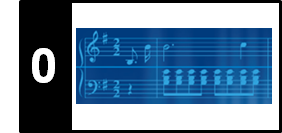

 <img> tag with linked image file:


In [ ]:
path_filename = os.path.join(
    "..", "..", "..", "data", "learning", "multimedia", "FMP_B_Chapters_C0_nav.png"
)

# Filename argument
print(" <img> tag with embedded image file:", flush=True)
ipd.display(ipd.Image(filename=path_filename, width=100))

# URL argument
print(" <img> tag with linked image file:", flush=True)
ipd.display(ipd.Image(url=path_filename, width=100))

Images are being displayed row-wise for easier data analysis

In [27]:
pd.set_option("display.max_colwidth", None)

f_img1 = os.path.join("..", "..", "..", "data", "B", "FMP_B_Chapters_C0_nav.png")
f_img2 = os.path.join("..", "..", "..", "data", "B", "FMP_B_Chapters_C1_nav.png")
f_img3 = os.path.join("..", "..", "..", "data", "B", "FMP_B_Chapters_C2_nav.png")
f_img4 = os.path.join("..", "..", "..", "data", "B", "FMP_B_Chapters.gif")

img1 = ipd.Image(url=f_img1, width=100)._repr_html_()
img2 = ipd.Image(url=f_img2, width=100)._repr_html_()
img3 = ipd.Image(url=f_img3, width=100)._repr_html_()
img4 = ipd.Image(url=f_img4, width=100)._repr_html_()

# Generation of two-dimensional tabular data structure (with rows and columns)
df = pd.DataFrame({"images": [img1, img2, img3, img4]})
print(df)

# Rendering of a DataFrame as an HTML table
ipd.display(ipd.HTML(df.T.to_html(escape=False, header=False, index=False)))

                                                               images
0  <img src="../../../data/B/FMP_B_Chapters_C0_nav.png" width="100"/>
1  <img src="../../../data/B/FMP_B_Chapters_C1_nav.png" width="100"/>
2  <img src="../../../data/B/FMP_B_Chapters_C2_nav.png" width="100"/>
3         <img src="../../../data/B/FMP_B_Chapters.gif" width="100"/>


,,,


## 3. Video files

Similar arguments can be provided for video files as well when using Ipython for importing the files

- Filename argument: Embeds the image file into the jupyter notebook `(embed=True)`. This increases the file size of the notebook since the image file content is part of the notebook along with markdown instructions and code

- ID argument: Instead of URL argument, the ID argument (specifically available for Youtube videos) takes the Youtube vidoe ID as the URL argument. The video stored remotely is fetched via an API request given the ID is provided as request parameter.

In [ ]:
path_filename = os.path.join(
    "..", "..", "..", "data", "B", "FMP_B_InterpretationSwitcher_small.mp4"
)

# Filename argument
ipd.display(ipd.Video(path_filename))

# URL argument
ipd.display(ipd.YouTubeVideo(id="PF05xP1NqUM", width=600, height=450))

### Codecs vs Containers

In multimedia processing, codecs and containers represent two different entities as follows:

**Codecs:** Codecs comprises of a component that is responsible for compressing a video/audio file to a manageable size based on storage requirements. E.g.: x264, H.264, MPEG4

**Containers:** Containers represent a collection of components of multimedia files such as video codec, audio codec along with additional data such as lyrics (text), container metadata. E.g.: AVI, MOV, MP4